# Projet n°3 : Concevez une application au service de la santé publique

# Notebook d'Exploration

Léa ZADIKIAN
Octobre 2022

Lien vers les données de Open Food Facts : https://world.openfoodfacts.org/

Page de définition des variables : https://world.openfoodfacts.org/data/data-fields.txt

# Imports

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#Lecture et affichage du fichier de données issu du notebook de nettoyage 'fr.openfoodfacts.org.products_clean.csv'
data=pd.read_csv('fr.openfoodfacts.org.products_clean.csv', sep=',')
data


,code,product_name,pnns_groups_2,sugars_100g,carbohydrates_100g,salt_100g,sodium_100g,fiber_100g,proteins_100g,nutrition_grade_fr,energy_kcal_100g,fat_100g,saturated-fat_100g,nutrition-score-fr_100g
0,40608754,"Pepsi, Nouveau goût !",Sweetened beverages,10.400000,10.400000,0.0254,0.010000,0.000,0.000,E,42.28,0.000000,0.00,13.0
1,87177756,7Up,Sweetened beverages,10.400000,10.400000,0.1000,0.039370,0.000,0.000,E,42.28,0.000000,0.00,13.0
2,10,Madeleines nature,Biscuits and cakes,26.000000,55.000000,0.6600,0.259843,1.500,6.000,D,453.81,23.000000,2.50,12.0
3,30,Cakes Raisins,Biscuits and cakes,28.000000,56.000000,0.6500,0.255906,1.800,5.800,D,422.28,19.000000,2.50,13.0
4,31,Cakes aux Fruits,Biscuits and cakes,34.000000,60.000000,0.6000,0.236220,1.500,4.900,D,398.87,15.000000,2.00,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42264,96068779,Spearmint sans sucres,Sweets,54.677758,95.870000,0.0050,0.001969,0.005,0.040,C,242.91,1.300000,1.28,4.0
42265,96118580,Fisherman's Friend Miel-Citron,Sweets,54.677758,95.310000,0.0010,0.000394,1.470,0.004,B,246.25,1.300000,1.28,2.0
42266,9778564312457,Nature cheddar and red onion crisps,Appetizers,1.800000,55.251287,1.3500,0.531496,5.600,7.800,C,514.71,24.054665,3.40,9.0
42267,9847548283004,Tartines craquantes bio au sarrasin,Bread,2.600000,74.800000,0.6800,0.267717,5.900,13.000,A,392.42,2.800000,0.60,-4.0


In [3]:
#Contrôle des types des variables
data.dtypes

code                         int64
product_name                object
pnns_groups_2               object
sugars_100g                float64
carbohydrates_100g         float64
salt_100g                  float64
sodium_100g                float64
fiber_100g                 float64
proteins_100g              float64
nutrition_grade_fr          object
energy_kcal_100g           float64
fat_100g                   float64
saturated-fat_100g         float64
nutrition-score-fr_100g    float64
dtype: object

# 1. Analyse univariée

## 1.1 Variables numériques
- Statistiques descriptives
- Représentation des distributions avec diagramme en barres et boîte à moustaches

In [4]:
#dataframe des variables numériques
numerical_columns_df =data.select_dtypes(include=['float64'])

In [5]:
# Statistiques descriptives des variables numériques
numerical_columns_df.describe().round(2)

,sugars_100g,carbohydrates_100g,salt_100g,sodium_100g,fiber_100g,proteins_100g,energy_kcal_100g,fat_100g,saturated-fat_100g,nutrition-score-fr_100g
count,42269.00,42269.00,42269.00,42269.00,42269.00,42269.00,42269.00,42269.00,42269.00,42269.00
mean,11.81,25.94,0.74,0.29,1.26,7.33,256.14,12.72,5.04,8.21
std,16.90,26.98,0.85,0.33,2.14,6.99,183.75,16.57,7.90,8.94
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-6.04,-1.84,-14.00
25%,1.00,3.50,0.06,0.02,0.00,1.40,97.93,1.00,0.30,1.00
50%,3.70,12.00,0.53,0.21,0.00,6.00,233.35,6.50,1.80,8.00
75%,13.91,52.20,1.20,0.47,1.90,10.20,384.78,20.00,6.50,15.00
max,92.00,100.00,6.20,2.44,19.20,34.00,1044.00,124.63,100.00,33.00


**Représentation graphique des distributions**

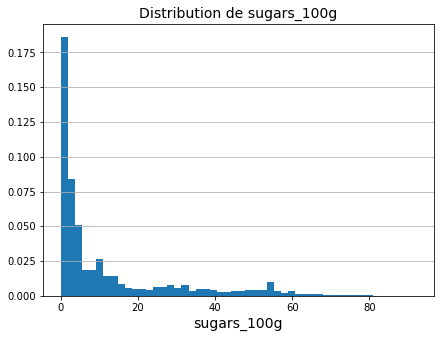

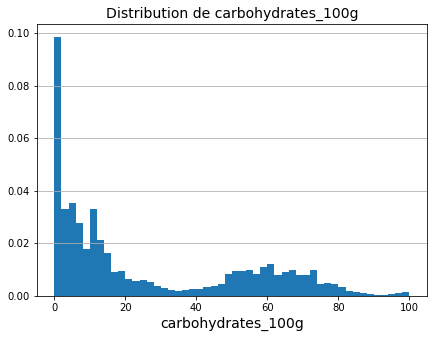

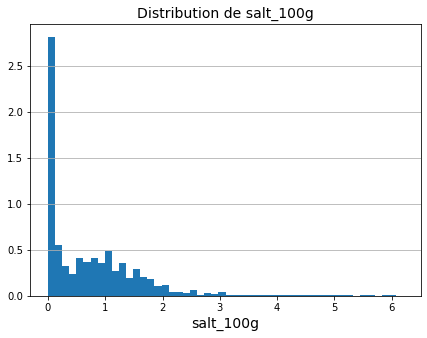

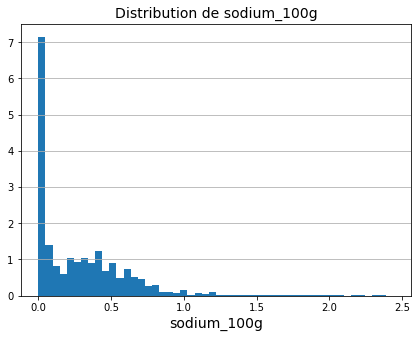

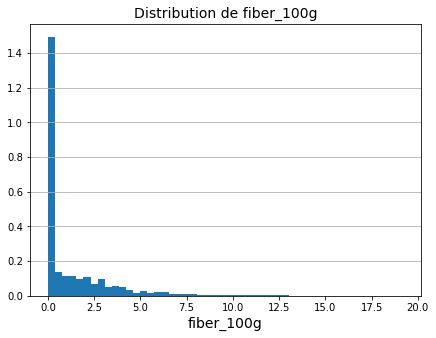

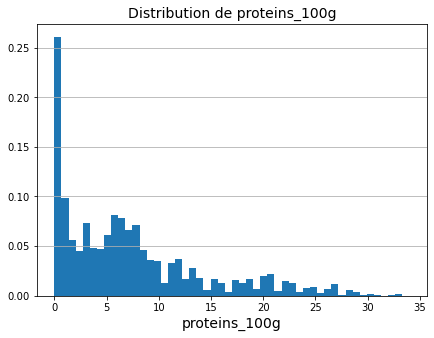

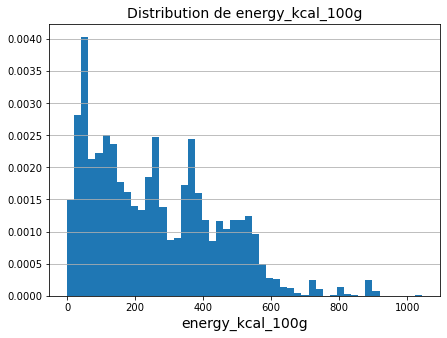

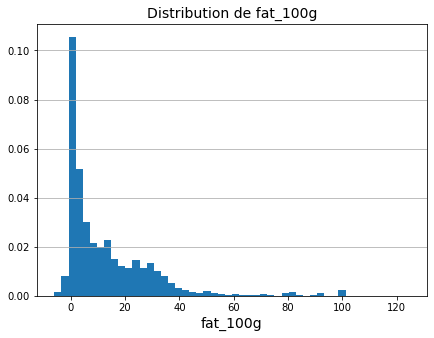

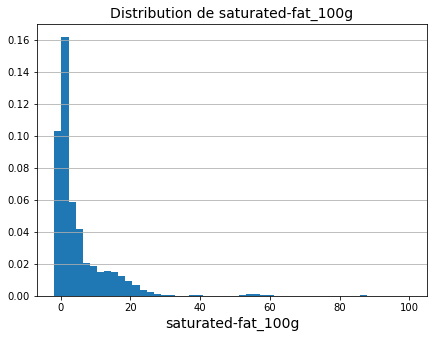

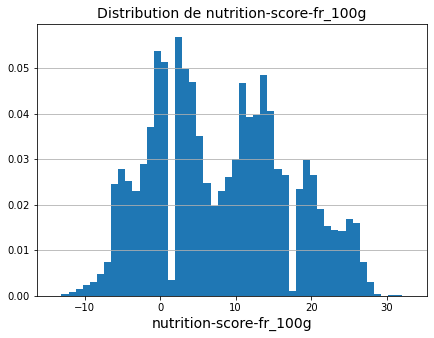

In [6]:
# Boucle sur les variables du dataframe numérique pour représenter la distribution de chaque variable

for column in numerical_columns_df:

    plt.figure(figsize = (7,5))
    plt.hist(data[column], density=True,bins=50)
    plt.title('Distribution de ' + column, fontsize=14)
    #plt.xlim(0,40)
    plt.xlabel(column,fontsize=14)
    plt.grid(axis='y')
    plt.show()

**Boîte à moustaches**

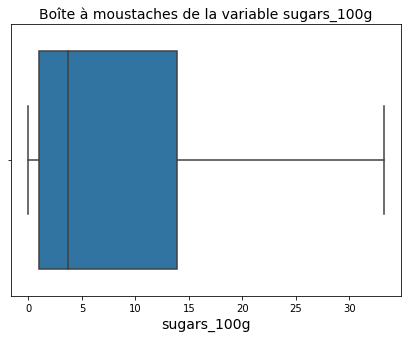

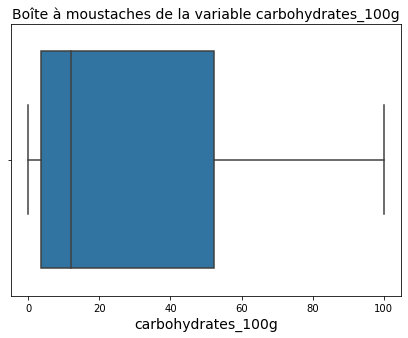

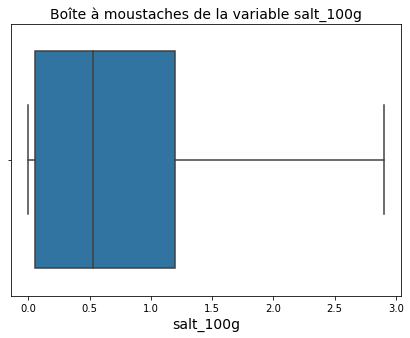

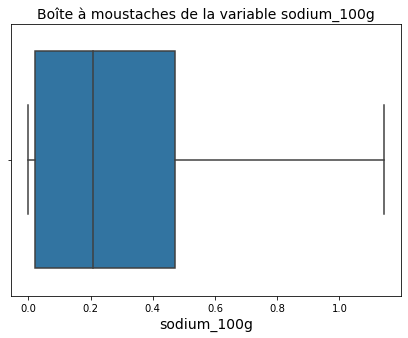

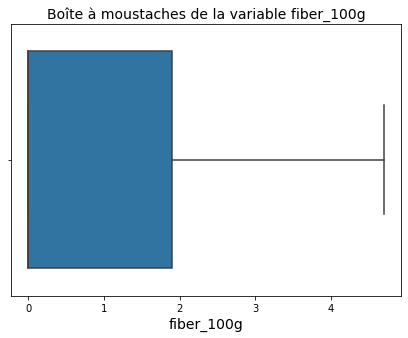

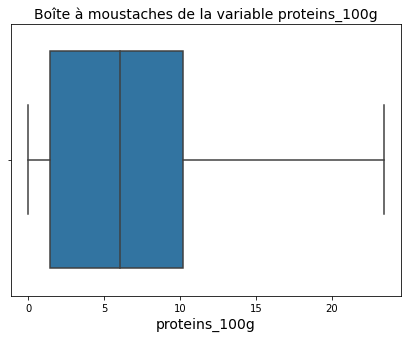

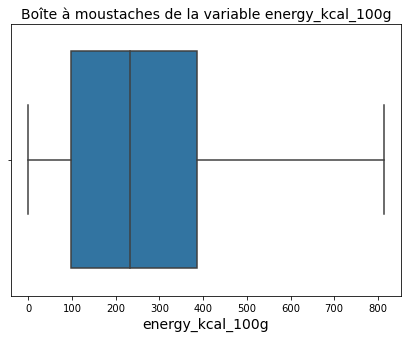

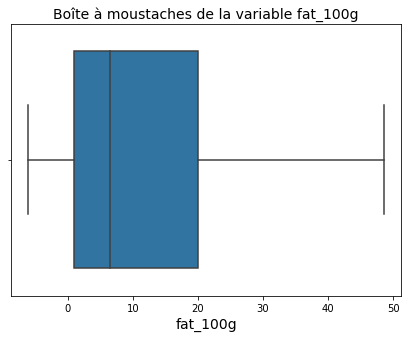

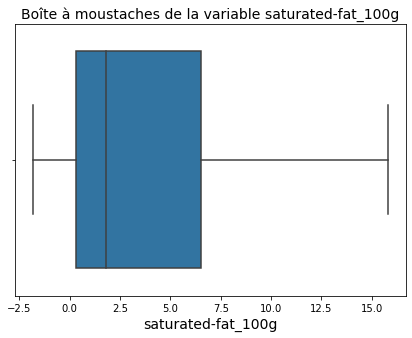

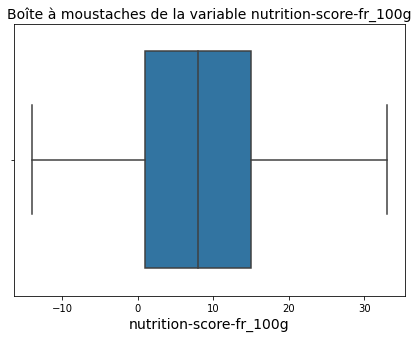

In [7]:
# Boucle sur les variables du dataframe numérique pour représenter la boîte à mousatches de chaque variable


for column in numerical_columns_df:
    plt.figure(figsize = (7,5))
    sns.boxplot(x=data[column],showfliers=False)
    plt.title('Boîte à moustaches de la variable ' + column,fontsize=14)
    plt.xlabel(column,fontsize=14)
    plt.show()


## 1.2 Variable catégorielle
Test de 2 représentations de la distribution pour la variable catégorielle Nutri-score : bar chart et pie chart

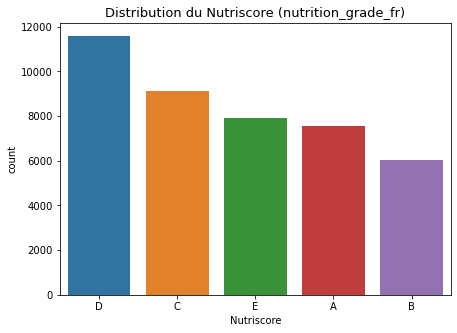

In [8]:
labels =data['nutrition_grade_fr'].value_counts(normalize=True).sort_values(ascending=False).index
values = data['nutrition_grade_fr'].value_counts(normalize=True).sort_values(ascending=False).values

# Diagramme en barres (bar chart) pour la variable Nutriscore (en lettres)
plt.figure(figsize = (7,5))
sns.countplot(x = data['nutrition_grade_fr'], order=labels)
plt.title('Distribution du Nutriscore (nutrition_grade_fr)',fontsize=13)
plt.xlabel('Nutriscore')
plt.show()

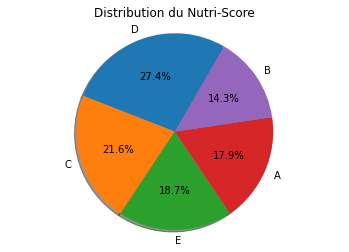

In [9]:
# Diagramme en secteurs

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=True, startangle=60)

#Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
ax1.axis('equal')   
plt.title('Distribution du Nutri-Score')
plt.show()

Les produits de qualité nutritionnelle médiocres ou mauvaise ( nutriscore C, D, E) représentent près de  70% des produits du jeu de données.
Les produits de très bonne, ou bonne qualité ( A ou B), représentent environ 30 % des produits.

# 2. Analyse bivariée

## 2.1 Représentation graphique de 2 variables numériques : Diagramme de dispersion (scatterplot)

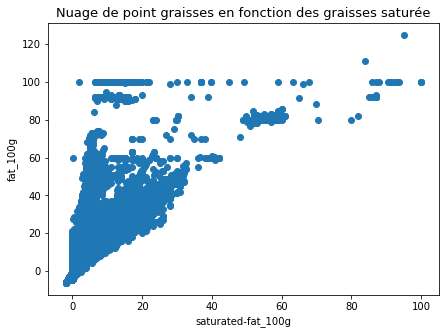

In [10]:
# Nuage de point graisses en fonction des graisses saturées'
plt.figure(figsize = (7,5))
plt.scatter(data['saturated-fat_100g'],data['fat_100g'])
plt.title('Nuage de point graisses en fonction des graisses saturée',fontsize=13)
plt.xlabel('saturated-fat_100g')
plt.ylabel('fat_100g')
plt.show()

In [11]:
# calculer le coefficient de Pearson ou coeffecient de corrélation pour lesgraisses et les graisses saturées
R=st.pearsonr(data['saturated-fat_100g'],data['fat_100g'])[0]
round(R,5)

0.76828

On retrouve le fait que la quantité de graisses est toujours supérieure à la quantité de graisses saturées.

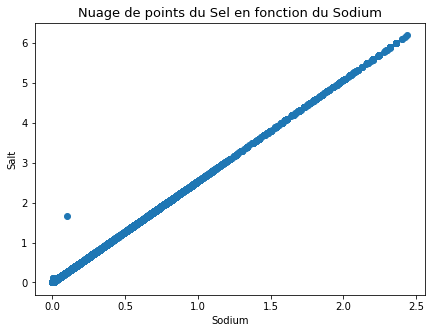

In [12]:
#Nuage de point du sel en focntion du sodium
plt.figure(figsize = (7,5))
plt.xlabel('Sodium')
plt.ylabel('Salt')
plt.scatter(data['sodium_100g'],data['salt_100g'])
plt.title('Nuage de points du Sel en fonction du Sodium',fontsize=13)
plt.show()

In [13]:
# calculer le coefficient de Pearson ou coeffecient de corrélation pour le sel et le sodium
R=st.pearsonr(data['salt_100g'],data['sodium_100g'])[0]
round(R,5)

0.99997

On retrouve bien le rapport 2.4 qui existe entre la quantité de sodium et la quantité de sel. La corrélation est quasi parfaite sur le jeu de données

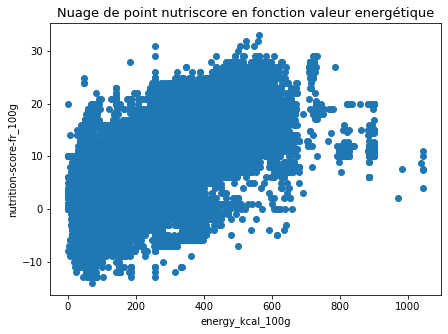

In [14]:
# Nutriscore en fonction de la valeur energétique
plt.figure(figsize = (7,5))
plt.scatter(data['energy_kcal_100g'],data['nutrition-score-fr_100g'])
plt.title('Nuage de point nutriscore en fonction valeur energétique',fontsize=13)
plt.xlabel('energy_kcal_100g')
plt.ylabel('nutrition-score-fr_100g')
plt.show()

In [15]:
# calculer le coefficient de Pearson ou coeffecient de corrélation pour energy et graisses saturées
R=st.pearsonr(data['energy_kcal_100g'],data['nutrition-score-fr_100g'])[0]
round(R,5)

0.60575

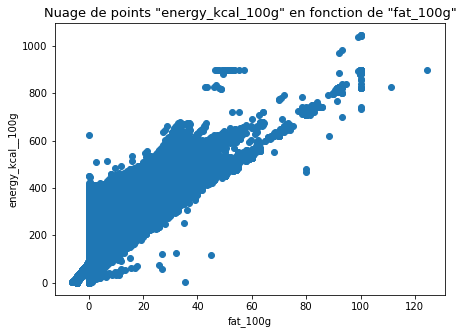

In [16]:
#Nuage de point du energy  en fonction des graisses
plt.figure(figsize = (7,5))
plt.scatter(data['fat_100g'],data['energy_kcal_100g'])
plt.title('Nuage de points "energy_kcal_100g" en fonction de "fat_100g"',fontsize=13)
plt.xlabel('fat_100g')
plt.ylabel('energy_kcal__100g')
plt.show()

In [17]:
# calculer le coefficient de Pearson ou coeffecient de corrélation pour energy et graisses saturées
R=st.pearsonr(data['energy_kcal_100g'],data['fat_100g'])[0]
round(R,5)

0.8147

La valeur energétique est assez bien corrélée avec la quantité de graisses

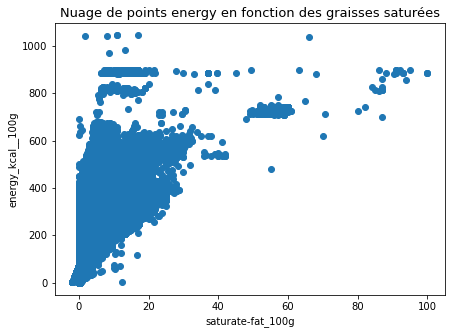

In [18]:
#Nuage de point du energy  en graisses saturées
plt.figure(figsize = (7,5))
plt.scatter(data['saturated-fat_100g'],data['energy_kcal_100g'])
plt.title('Nuage de points energy en fonction des graisses saturées',fontsize=13)
plt.xlabel('saturate-fat_100g')
plt.ylabel('energy_kcal__100g')
plt.show()

In [19]:
# calculer le coefficient de Pearson ou coeffecient de corrélation pour le sel et le sodium
R=st.pearsonr(data['energy_kcal_100g'],data['saturated-fat_100g'])[0]
round(R,5)

0.62648

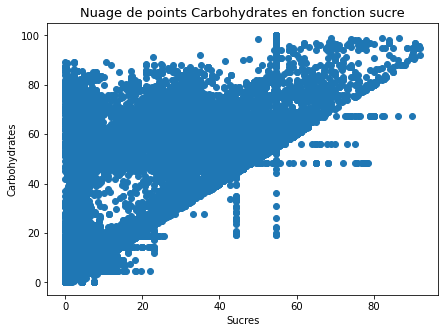

In [20]:
plt.figure(figsize = (7,5))
plt.scatter(data['sugars_100g'],data['carbohydrates_100g'])
plt.title('Nuage de points Carbohydrates en fonction sucre',fontsize=13)
plt.xlabel('Sucres')
plt.ylabel('Carbohydrates')
plt.show()

In [21]:
# calculer le coefficient de Pearson ou coeffecient de corrélation pour le sucre et les carbohydrates
R=st.pearsonr(data['sugars_100g'],data['carbohydrates_100g'])[0]
R

0.6399172005823446

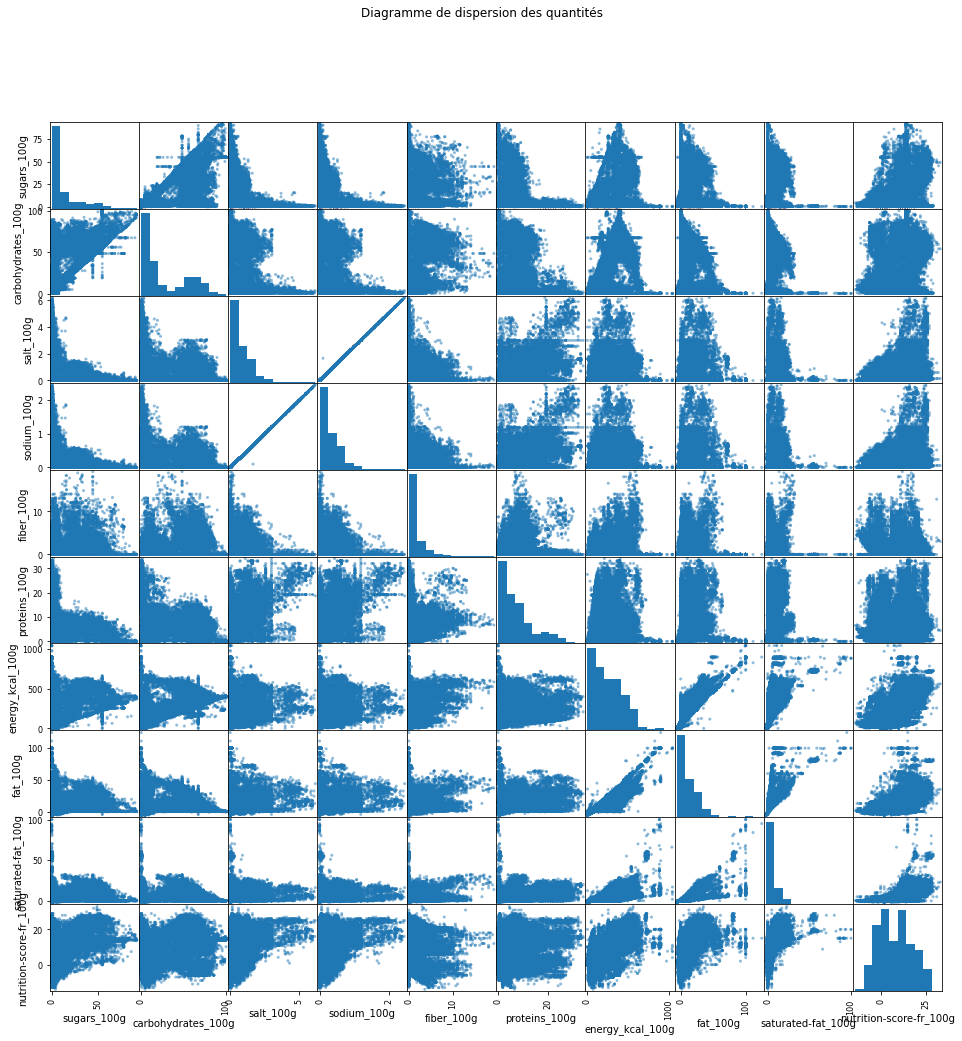

In [22]:
#Test ( résultat peu lisible)
scatter_matrix(numerical_columns_df, figsize=(16,16))
plt.suptitle('Diagramme de dispersion des quantités');

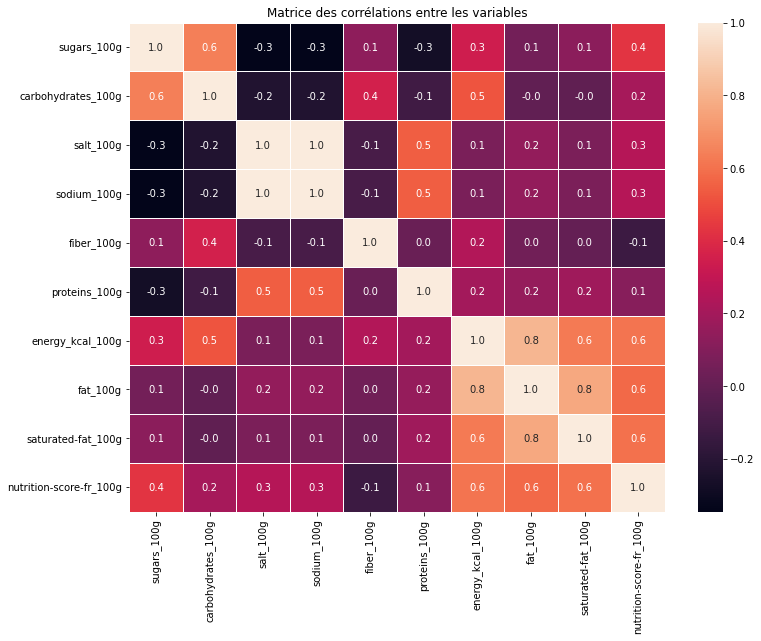

In [23]:
# Matrice des corrélations pour cohérence avec les résultats obtenus précédements
plt.figure(figsize=(12,9))
sns.heatmap(data=numerical_columns_df.corr(),annot=True,linewidth=0.5,fmt=".1f")
plt.title('Matrice des corrélations entre les variables')
plt.show()

La heatmap des corrélations présente la coefficient de corrélation entre chaque variable.

## 2.2 ANOVA Représentation graphique de 1 variable numérique en fonction d'une variable catégorielle 
Utilisation de boîte à moustaches pour représenter le Nutriscore (en lettre) en fonction d'une valeur nutritionnelle pour 100g de produits.
Cette représentation permet de représenter les variations de la variable numérique en focntion des modalités de la variable catégorielle.

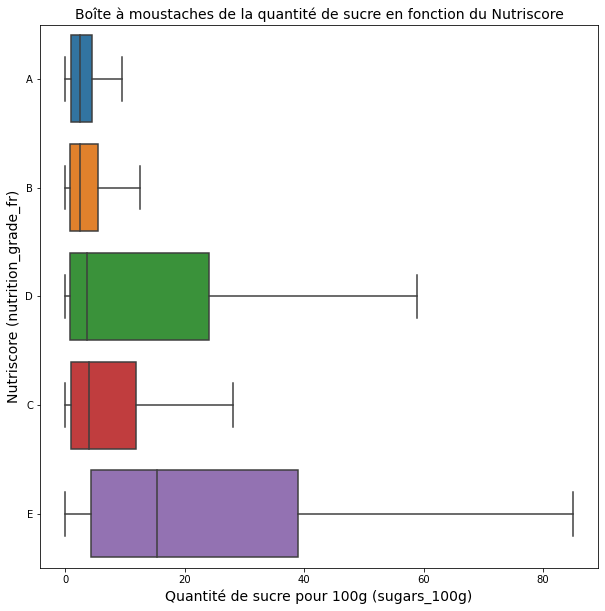

In [24]:
# Boxplot de la quantité de sucre par lettre de Nutriscore

ordre_nutriscore = data.groupby('nutrition_grade_fr')['sugars_100g'].median().sort_values().index
plt.figure(figsize=(10,10))
plt.title('Boîte à moustaches de la quantité de sucre en fonction du Nutriscore', fontsize=14)
sns.boxplot(x='sugars_100g', 
            y='nutrition_grade_fr', 
            showfliers=False,
            orient='h', 
            order=ordre_nutriscore,
            data=data)
plt.xlabel('Quantité de sucre pour 100g (sugars_100g)',fontsize=14)
plt.ylabel('Nutriscore (nutrition_grade_fr)',fontsize=14)
plt.show()

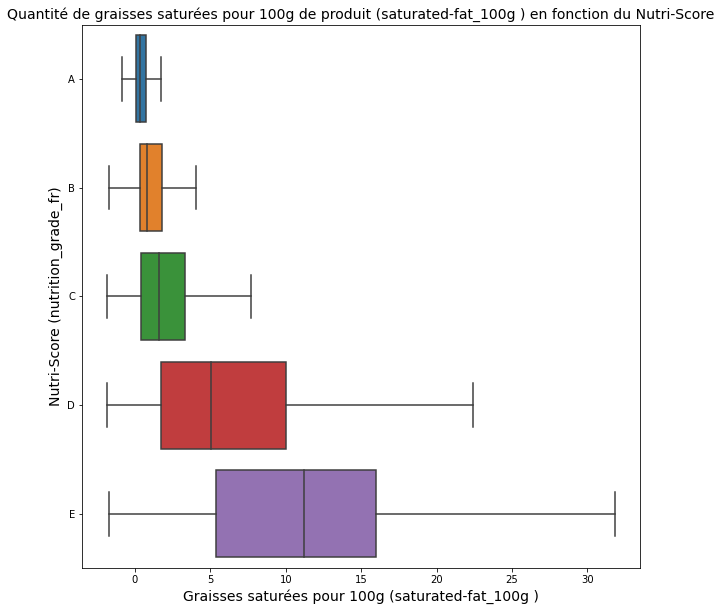

In [25]:
# Boxplot de la quantité de sucre par lettre de Nutriscore

ordre_nutriscore = data.groupby('nutrition_grade_fr')['saturated-fat_100g'].median().sort_values().index

plt.figure(figsize=(10,10))
plt.title('Quantité de graisses saturées pour 100g de produit (saturated-fat_100g ) en fonction du Nutri-Score', fontsize=14)
sns.boxplot(x='saturated-fat_100g' , 
            y='nutrition_grade_fr', 
            showfliers=False,
            orient='h', 
            order=ordre_nutriscore, 
            data=data)
plt.xlabel('Graisses saturées pour 100g (saturated-fat_100g )',fontsize=14)
plt.ylabel('Nutri-Score (nutrition_grade_fr)',fontsize=14)
plt.show()

La quantité de graisses saturées augmente avec le Nutri-Score.

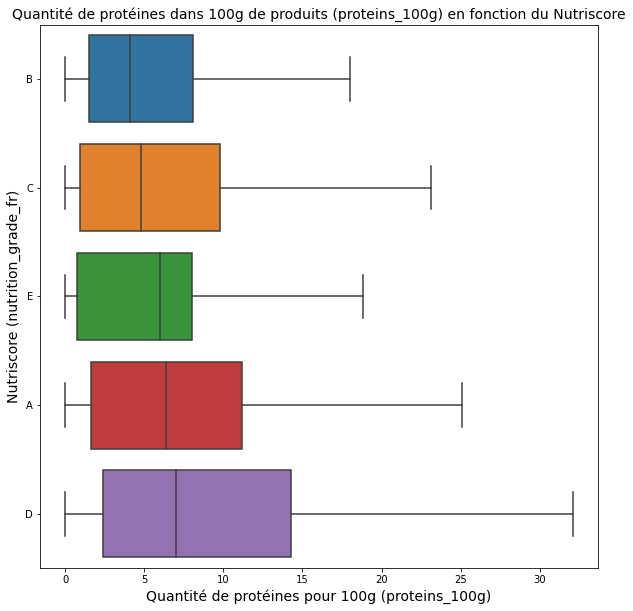

In [26]:
# Boxplot de la quantité de protéines par lettre de Nutriscore

ordre_nutriscore = data.groupby('nutrition_grade_fr')['proteins_100g'].median().sort_values().index

plt.figure(figsize=(10,10))
plt.title('Quantité de protéines dans 100g de produits (proteins_100g) en fonction du Nutriscore', fontsize=14)

sns.boxplot(x='proteins_100g', 
            y='nutrition_grade_fr', 
            showfliers=False,
            orient='h',
            order=ordre_nutriscore,
            data=data)
plt.xlabel('Quantité de protéines pour 100g (proteins_100g)',fontsize=14)
plt.ylabel('Nutriscore (nutrition_grade_fr)',fontsize=14)
plt.show()

La quantité de protéines ne reflète pas aussi bien le Nutri-score que les graisses saturées par exemple. La quantité de protéines médiane pour les produits de nutriscore D est supérieure à la quantité médiane pour les Nutri-score A, B et C.

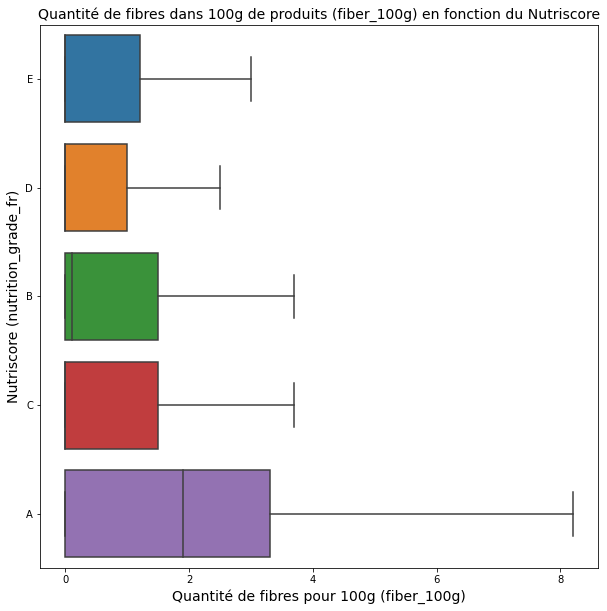

In [27]:
# Boxplot de la quantité de fibres par lettre de Nutriscore

ordre_nutriscore = data.groupby('nutrition_grade_fr')['fiber_100g'].mean().sort_values().index

plt.figure(figsize=(10,10))
plt.title('Quantité de fibres dans 100g de produits (fiber_100g) en fonction du Nutriscore', fontsize=14)

sns.boxplot(x='fiber_100g', 
            y='nutrition_grade_fr', 
            showfliers=False,
            orient='h',
            order=ordre_nutriscore,
            data=data)
plt.xlabel('Quantité de fibres pour 100g (fiber_100g)',fontsize=14)
plt.ylabel('Nutriscore (nutrition_grade_fr)',fontsize=14)
plt.show()

**Rapport de corrélation 𝜂2**

In [28]:
# fonction permettant de calculer  le rapport de corrélation𝜂2  (eta carré ou eta squared)
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    #Variation totale
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    #Variation interclasse
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [29]:
# Calcul le rapport de corrélation𝜂2  (eta carré ou eta squared) pour energy et nutriscore

X=data['nutrition_grade_fr']# qualitative
Y=data['saturated-fat_100g']# quantitative
    
round(eta_squared(X,Y),4)

0.2891

In [30]:
# Calcul le rapport de corrélation𝜂2  (eta carré ou eta squared) pour energy et nutriscore

X=data['nutrition_grade_fr']# qualitative
Y=data['proteins_100g']# quantitative
   
    
round(eta_squared(X,Y),4)

0.0272

Les rapports de corrélations obtenus semblent refléter la meilleure corrélation entre Nutri-Score et graisses saturées que entre Nutri-score et protéines

# 3. Réalisation d'une ACP (Analyse en composantes principales) 
Début de l'analyse ACP (ou PCA) qui se décomposent plusieurs étapes :

0. Data Split
1. Scaling : centrer et réduire les variables avec StandardScaler()
2. ACP
3. Variance retenue et Eboulis des valeurs propres
4.Calcul des composantes
5.Cercle des corrélations

In [31]:
dataACP=numerical_columns_df.dropna()

## 3.0 Data Split
Séparation des données, des features ( colonnes) et des index

In [32]:
# Matrice des données
X = dataACP.values

In [33]:
# vérification de la taille de la matrice de données
X.shape

(42269, 10)

In [34]:
# Features
features = dataACP.columns
features

Index(['sugars_100g', 'carbohydrates_100g', 'salt_100g', 'sodium_100g',
       'fiber_100g', 'proteins_100g', 'energy_kcal_100g', 'fat_100g',
       'saturated-fat_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [35]:
# Index
index = dataACP.index
index

RangeIndex(start=0, stop=42269, step=1)

## 3.1 Scaling
L'analyse ACP s'effectue des données centrées-reduites

In [36]:
# On instancie le scaler
scaler = StandardScaler()
# On effectue la transformation centrer et réduire
X_scaled = scaler.fit_transform(X)

In [37]:
# On vérifie que la moyenne de chaque variable est bien à 0 et l'écart-type est bien à 1 : 
pd.DataFrame(X_scaled).describe().round(2)

,0,1,2,3,4,5,6,7,8,9
count,42269.00,42269.00,42269.00,42269.00,42269.00,42269.00,42269.00,42269.00,42269.00,42269.00
mean,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.70,-0.96,-0.87,-0.87,-0.59,-1.05,-1.39,-1.13,-0.87,-2.49
25%,-0.64,-0.83,-0.80,-0.80,-0.59,-0.85,-0.86,-0.71,-0.60,-0.81
50%,-0.48,-0.52,-0.24,-0.24,-0.59,-0.19,-0.12,-0.38,-0.41,-0.02
75%,0.12,0.97,0.55,0.55,0.30,0.41,0.70,0.44,0.18,0.76
max,4.75,2.74,6.43,6.43,8.38,3.82,4.29,6.75,12.02,2.77


## 3.2 ACP

In [38]:
# On instancie ACP : 
n_components = 6
pca = PCA(n_components=n_components)
# On l'entraine sur les données scalées : 
X=pca.fit_transform(X_scaled)
X

array([[-1.6361108 , -0.58329788,  1.04864133, -0.81140239,  0.357549  ,
         0.43436382],
       [-1.59971544, -0.4978727 ,  1.0011851 , -0.84504486,  0.40437347,
         0.42615803],
       [ 1.05478767, -1.17671221, -0.64489879, -0.37665289,  0.02735436,
        -0.69532817],
       ...,
       [ 1.4288308 , -0.05826731, -1.89508695,  1.38482957,  0.95800643,
        -0.7212076 ],
       [-0.34589323, -0.63247782, -2.69810498,  1.83306875, -0.4236098 ,
        -0.64338277],
       [-2.37772107, -0.06976598,  1.18093927,  0.06340847,  0.27484958,
         0.13858776]])

## 3.3  Variance retenue & Eboulis ( scree plot)

In [39]:
# Variance captée par chaque nouvelle composante
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([33.31, 28.36, 13.52, 10.46,  5.77,  4.26])

 La 1ère composante capte 33 % de la variance des données initiales, la 2ème 28 %.

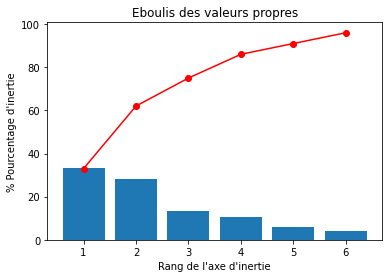

In [40]:
# Variance retenue cumulée
scree_cum = scree.cumsum().round()

#Représentation graphique de 
x_list = range(1, n_components+1)
list(x_list)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("% Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)



En bleu le pourcentage de variance retenue de chaque nouvelle composante, et en rouge la variance cumulée.
Environ 75% de la variance est comprise dans les 3 premières composantes, et plus de 85% dans les 4 premières. 

# 3.4 Calcul des composantes

In [41]:
# Calcul des compotantes
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,sugars_100g,carbohydrates_100g,salt_100g,sodium_100g,fiber_100g,proteins_100g,energy_kcal_100g,fat_100g,saturated-fat_100g,nutrition-score-fr_100g
F1,0.14,0.14,0.21,0.21,0.05,0.20,0.48,0.46,0.43,0.44
F2,-0.43,-0.39,0.49,0.49,-0.17,0.35,-0.18,-0.03,-0.05,-0.06
F3,-0.18,-0.51,-0.27,-0.27,-0.52,-0.26,-0.09,0.29,0.35,0.10
F4,-0.45,-0.16,-0.19,-0.19,0.61,0.16,0.16,0.27,0.19,-0.41
F5,-0.05,-0.15,0.27,0.27,0.37,-0.81,-0.07,0.14,-0.06,0.13
F6,0.40,-0.42,-0.05,-0.05,0.41,0.23,-0.42,-0.25,0.34,0.29


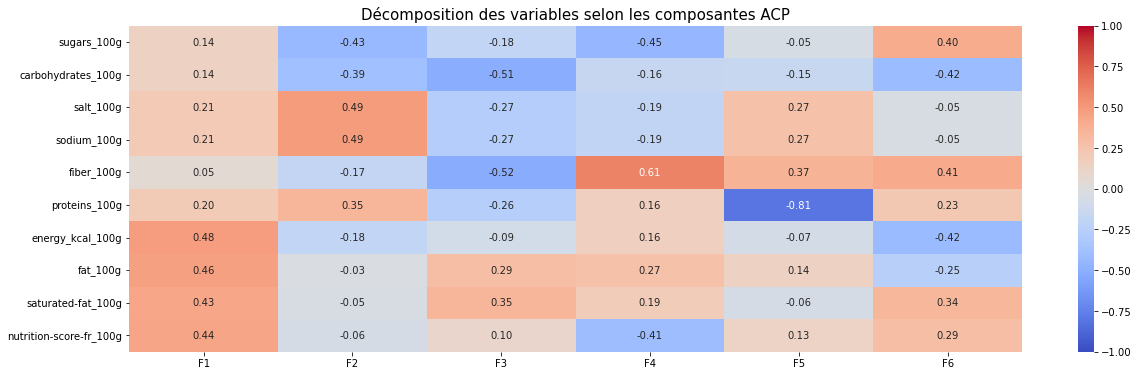

In [42]:
# Représentation graphique de la décomposition des variables selons les composantes
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.title('Décomposition des variables selon les composantes ACP', fontsize=15);

Les variables peuvent s'exprimer comme combinaisons linéraires des axes d'inertie.

## 3.4 Cercle des Corrélations

In [43]:
# Utilisation de la focntion défnie dans le TP associé au cours Analyse exploratoire de données

def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[0, i],  
                pca.components_[1, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[0, i] + 0.05,
                pca.components_[1, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

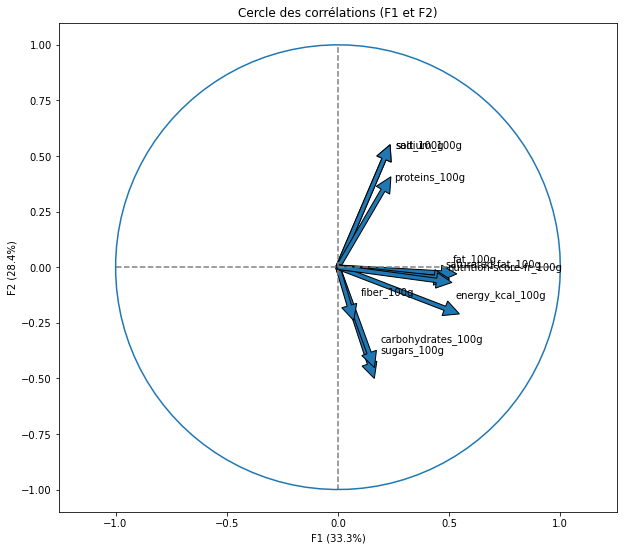

In [44]:
# Cercle des corrélations des composantes F1 et F2
x_y = (0,1)
correlation_graph(pca, x_y, features)

Les variables les plus corrélées à F1 :
le nutriscore
l'énergie
les graisses
les graisses saturées

Les variables les plus corrélées à F2 :
Sel et sodium
Sucre et carbohydrates (avec corrélation négative)


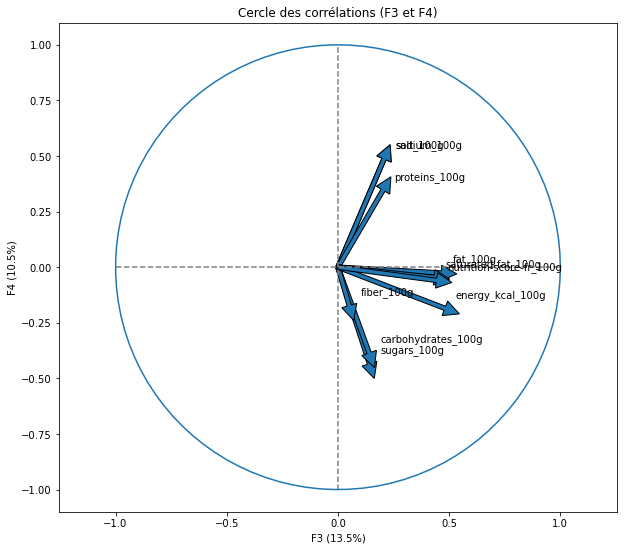

In [45]:
# Cercle des corrélations des composantes F3 et F4
x_y = (2,3)
correlation_graph(pca, (x_y), features)

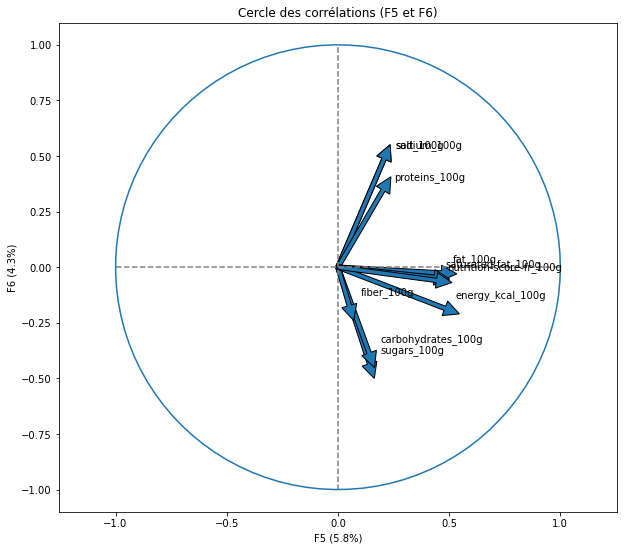

In [46]:
# Cercle des corrélations des composantes F3 et F4
x_y = (4,5)
correlation_graph(pca, (x_y), features)

## 3.5 Projection des individus ( produits) sur les plans factoriels
Uitlisation de la fonction display_factorial_planes issue du TP associé au cours sur l'analyse exploratoire

In [47]:
# Fonction reprise du TP du cours sur l'analyse exploratoire
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    plt.scatter(   X_[:, x], 
                        X_[:, y], 
                        alpha=alpha, 
                        c=c, 
                        cmap="Set1", 
                        marker=marker)


    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()



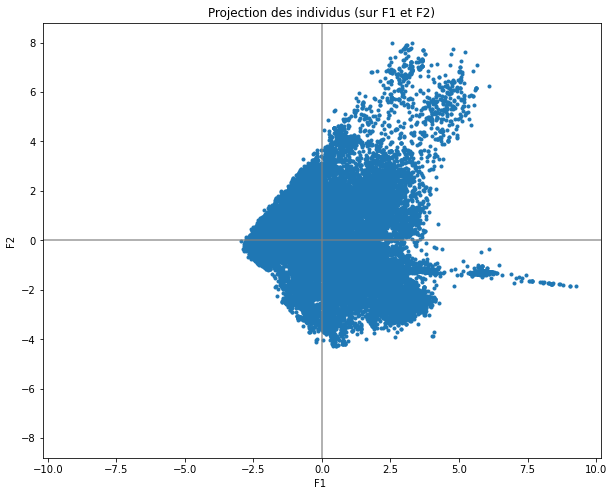

In [48]:
# Projection des individus ( les produits) sur le plan factoriel
X_proj = pca.transform(X_scaled)
x_y = [0,1]
display_factorial_planes(X_proj, x_y)